# Implenenting LSH(Locality Sensitive Hashing) from Scratch
Shingling -----> MinHashing ------> Final Banded LSH

#Shingling

* Convert the text into a set of k sized strings
Ex: text = 'Happy to learn LSH' and k = 2

After shingling = set('Ha', 'ap', 'pp', 'py'...' L'.....'SH')

* Note: No Duplicates

In [1]:
def gen_shingles(text: str, k: int):
  shingles = []  #To store shingles

  for i in range(len(text) - k + 1):
    shingle = text[i:i + k]
    shingles.append(shingle) #append strings from curr index to next k chars
  #print(shingles)

  return set(shingles)


In [2]:
#text1 = "flying fish flew by the space station"
#text2 = "we will not allow you to bring your pet armadillo along"
#text3 = "he figured a few sticks of dynamite were easier than a fishing pole to catch fish"
text1 = 'Data Mining'
text3 = 'Advanced Data Mining'
text2 = 'Enterprise'
k = 2

text1 = gen_shingles(text1, k)
text2 = gen_shingles(text2, k)
text3 = gen_shingles(text3, k)

text1, text2, text3 # set is an unordered collection

({' M', 'Da', 'Mi', 'a ', 'at', 'in', 'ng', 'ni', 'ta'},
 {'En', 'er', 'is', 'nt', 'pr', 'ri', 'rp', 'se', 'te'},
 {' D',
  ' M',
  'Ad',
  'Da',
  'Mi',
  'a ',
  'an',
  'at',
  'ce',
  'd ',
  'dv',
  'ed',
  'in',
  'nc',
  'ng',
  'ni',
  'ta',
  'va'})

* **Now Let's create our vocabulary set by combining all shingle sets**

In [3]:
vocab = text1.union(text2).union(text3)
vocab

{' D',
 ' M',
 'Ad',
 'Da',
 'En',
 'Mi',
 'a ',
 'an',
 'at',
 'ce',
 'd ',
 'dv',
 'ed',
 'er',
 'in',
 'is',
 'nc',
 'ng',
 'ni',
 'nt',
 'pr',
 'ri',
 'rp',
 'se',
 'ta',
 'te',
 'va'}

* **One-Hot Encoding:**
  If a shingle in text1 is available in vocab list then set to 1 otherwise 0 

In [4]:
text1_enc = [1 if s in text1 else 0 for s in vocab]
text2_enc = [1 if s in text2 else 0 for s in vocab]
text3_enc = [1 if s in text3 else 0 for s in vocab]

text1_enc

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

# Min Hashing

In [5]:
nums = list(range(1, len(text1_enc) + 1))
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [6]:
import random
from random import shuffle

shuffle(nums)
random_nums = nums
random_nums

[3,
 5,
 4,
 21,
 1,
 6,
 8,
 19,
 27,
 10,
 22,
 20,
 18,
 23,
 14,
 25,
 13,
 17,
 24,
 2,
 16,
 26,
 9,
 11,
 7,
 15,
 12]

```
random_nums   text1_enc
7               0
1               0
3               1       
6               1               Signature = [3]
4               0
2               0
5               0
8               1
```

In [7]:
def create_hash(size):
  hash = list(range(1, len(vocab) + 1))
  shuffle(hash)
  return hash

In [8]:
def build_minhash_func(vocab_size: int, nbits: int):
    hashes = []
    for i in range(nbits):
        hashes.append(create_hash(vocab_size))
    return hashes

# create 20 minhash vectors
minhash = build_minhash_func(len(vocab), 20)
#minhash

In [9]:
def create_sig(onehot_enc: list):
    # To create signatures
    signature = []
    for func in minhash:
        for i in range(1, len(vocab)+1):
            idx = func.index(i)
            if onehot_enc[idx] == 1:
                signature.append(idx)
                break
    return signature

In [10]:
text1_sig = create_sig(text1_enc)
text2_sig = create_sig(text2_enc)
text3_sig = create_sig(text3_enc)

print(text1_sig)
print(text2_sig)

[4, 15, 16, 3, 4, 18, 20, 22, 18, 20, 16, 22, 4, 22, 4, 8, 16, 3, 20, 11]
[7, 6, 24, 7, 14, 7, 26, 7, 24, 7, 9, 2, 7, 17, 10, 6, 14, 9, 14, 2]


# Find Jaccard Similarity

In [11]:
def jaccard(a, b):
  return len(a.intersection(b)) / len(a.union(b))

In [12]:
jaccard(text1, text2), jaccard(set(text1_sig), set(text2_sig))

(0.0, 0.0)

In [13]:
jaccard(text1, text3), jaccard(set(text1_sig), set(text3_sig))

(0.5, 0.5)

In [14]:
jaccard(text2, text3), jaccard(set(text2_sig), set(text3_sig))

(0.0, 0.0)

* **Create buckets and fill them with signatures**



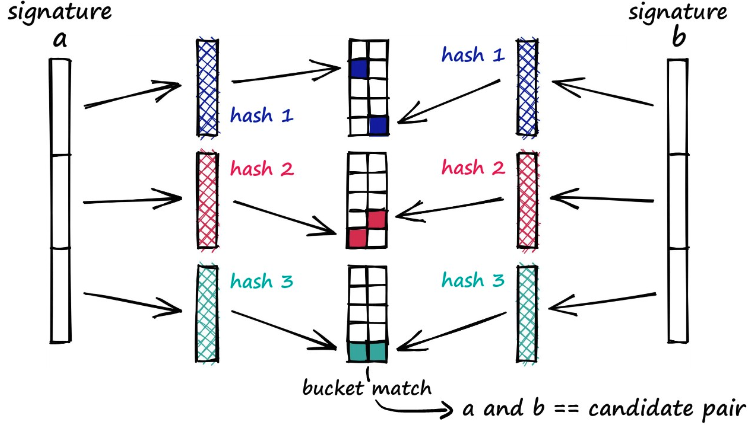

In [15]:
def fill_buckets(signatures, bands):
  n = len(signatures) // bands   #numbers of sig in each bucket
  #print(n)
  bucket = [] # List of lists
  i = 0
  while i < len(signatures):
    bucket.append(signatures[i: i + n]) #add n sig to buckets
    i += n
  return bucket



In [16]:
band_text1 = fill_buckets(text1_sig, 10)
band_text2 = fill_buckets(text2_sig, 10)
band_text3 = fill_buckets(text3_sig, 10)

band_text1, band_text2, band_text3

([[4, 15],
  [16, 3],
  [4, 18],
  [20, 22],
  [18, 20],
  [16, 22],
  [4, 22],
  [4, 8],
  [16, 3],
  [20, 11]],
 [[7, 6],
  [24, 7],
  [14, 7],
  [26, 7],
  [24, 7],
  [9, 2],
  [7, 17],
  [10, 6],
  [14, 9],
  [14, 2]],
 [[4, 15],
  [16, 3],
  [4, 18],
  [20, 22],
  [18, 20],
  [12, 13],
  [23, 22],
  [4, 12],
  [16, 3],
  [25, 19]])

In [17]:
for text1, text2 in zip(band_text1, band_text2):
  if text1 == text2:
    print("Candidadte Pairs = {},{}".format(text1, text2))
    break # As we meed only one candidate pair


In [18]:
for text2, text3 in zip(band_text2, band_text3):
  if text2 == text3:
    print("Candidadte Pairs = {},{}".format(text2, text3))
    break # As we meed only one candidate pair

In [19]:
for text3, text1 in zip(band_text3, band_text1):
  if text3 == text1:
    print("Candidadte Pairs = {},{}".format(text3, text1))
    break # As we meed only one candidate pair

Candidadte Pairs = [4, 15],[4, 15]
